## Figure 4: Multiple equilibria

Figure that shows banking after last period as a function of the initial allowance price, and illustrates the possibility of multiple equilibria from the MSR model, that is defined where the initial price intercepts with last period banking being equal to zero.


### Setup

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a list for time periods t that ranges from 0 to 45. Generate a corresponding list for the years of the scheme.
t = list(range(0, 31))
year = list(map(str, range(2020, 2051)))

# Generate dictionnary
dictionnary = {'t': t, 'year':year}

# Generate Dataframe from dictionnary
df = pd.DataFrame(dictionnary)


### Variables

In [82]:
# Add alpha to the Dataframe
alpha = []

for value in df["t"]:
    if value <= 3:
        alpha.append(0.24)
    if value > 3:
        alpha.append(0.12)
        
df["alpha"] = alpha

# Add supply to the Dataframe
s_t = []

for value in df["t"]:
    s_t.append(1859 - (43.003515)*value)
    
df["s(t)"] = s_t  


### Model and While loop that generates the data for figure 2

In [92]:
# Parameter for beta
beta = 0.57 

# Parameters for demand 
d0 = 1380.2
p0 = 24.76
b_par = 8.492
a_par = d0 + b_par*p0

# Add empty variables to the dataframe
df["p(t)"] = np.nan
df["d(t)"] = np.nan
df["M(t)"] = np.nan
df["B(t)"] = np.nan
df["c(t)"] = np.nan
df["m_in(t)"] = np.nan
df["m_out(t)"] = np.nan

# Set initial values for variables
df.loc[0, 'd(t)'] = 0
df.loc[0, 'M(t)'] = 1924
df.loc[0, 'B(t)'] = 1579
df.loc[0:2, 'c(t)'] = 0
df.loc[0, 'm_in(t)'] = df.loc[0, 'm_out(t)'] = 0

df.loc[0, 'p(t)'] = 20
loopcount = 30.1

p0_initial_store = []
B_end = []

while df.loc[0, 'p(t)'] < loopcount:
    
    for i in range(1, len(df)):
        df.loc[i, 'p(t)'] = df.loc[i-1, 'p(t)'] * (1 + 0.05)                                                                           # EQ1
    
        df.loc[i, 'd(t)'] = a_par - (b_par * df.loc[i, 'p(t)'])                                                                        # EQ2
    
        df.loc[i, 'm_in(t)'] = max(0, df.loc[i, 'alpha'] * df.loc[i-1, 'B(t)'] * (df.loc[i-1, 'B(t)'] - 833))\
        * (df.loc[i-1, 'B(t)'] - 833) / ((df.loc[i-1, 'B(t)'] - 833) * (df.loc[i-1, 'B(t)'] - 833) + 0.01)                             # EQ3
    
        df.loc[i, 'm_out(t)'] = min(df.loc[i-1, 'M(t)'], (max(0, 100*(400 - df.loc[i-1, 'B(t)'])) * (400 - df.loc[i-1, 'B(t)'])\
                                / ((400 - df.loc[i-1, 'B(t)']) * (400 - df.loc[i-1, 'B(t)']) + 0.01)))                             # EQ4
    
        df.loc[i, 'M(t)'] = df.loc[i-1, 'M(t)'] + df.loc[i, 'm_in(t)'] - df.loc[i, 'm_out(t)'] - df.loc[i-1, 'c(t)']                   # EQ5
    
        if df.loc[i, 't'] > 2:                                                                                                         # EQ6
            df.loc[i, 'c(t)'] = max(0, df.loc[i, 'M(t)'] - 0.57*df.loc[i, 's(t)'])
        else:
            df.loc[i, 'c(t)'] = 0

        df.loc[i, 'B(t)'] = df.loc[i, 's(t)'] - df.loc[i, 'm_in(t)'] + df.loc[i, 'm_out(t)'] - df.loc[i, 'd(t)'] + df.loc[i-1, 'B(t)'] # EQ7

    
    
    p0_initial_store.append(df.loc[0, 'p(t)'])
    B_end.append(df.loc[30, 'B(t)'])
    df.loc[0, 'p(t)'] += 0.1

### Save data

In [93]:
dict2 = {'p0': p0_initial_store, 'B_end':B_end}
df2 = pd.DataFrame(dict2)

### Plot figure

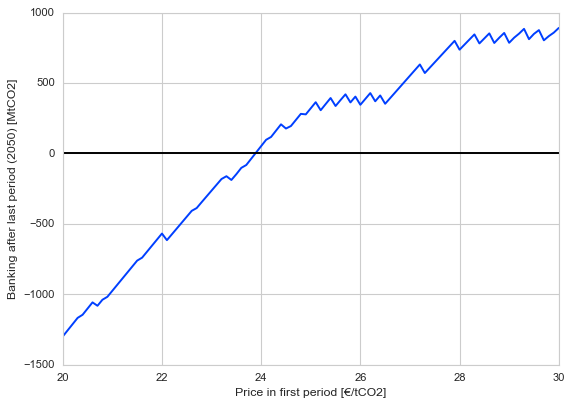

In [94]:
from matplotlib import style

ax = plt.gca()

# Use plot() method
df2.plot( x = 'p0' , y = 'B_end', legend=None, ax = ax )
plt.xlabel('Price in first period [€/tCO2]')
plt.ylabel('Banking after last period (2050) [MtCO2]')
plt.axhline(0, color = "black")
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()